# Decision Tree Modelling

In [724]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [725]:
df = pd.read_excel('Threshold_Data.xlsx')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,HouseHoldMembers,Total_Children,Total_Spent,BuyingPower,TotalPurchases,Dt_CustomerConverted,SinceEnrolled,Interest,CLV,AOV
0,0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,...,1,0,1190,0.014027,15,2014-06-16,3541,1,5772.315068,79.333333
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,1,0,577,0.010107,18,2014-06-15,3542,5,2799.635616,32.055556
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,3,1,251,0.003731,11,2014-05-13,3575,2,1229.212329,22.818182
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,...,4,2,11,0.000339,4,2014-11-05,3399,7,51.217808,2.750000
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,...,2,1,91,0.004238,8,2014-08-04,3492,7,435.304110,11.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2235,10142,1976,PhD,Single,66476.0,0,1,2013-07-03,99,...,2,1,689,0.010365,20,2013-07-03,3889,103,3670.576712,34.450000
2210,2236,5263,1977,n_Cycle,Married,31056.0,1,0,2013-01-22,99,...,3,1,55,0.001771,5,2013-01-22,4051,107,305.212329,11.000000
2211,2237,22,1976,Graduation,Single,46310.0,1,0,2012-03-12,99,...,2,1,309,0.006672,14,2012-03-12,4367,107,1848.497260,22.071429
2212,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,2,0,1383,0.021012,20,2012-11-29,4105,102,7777.006849,69.150000


In [726]:
selected_columns = [
    'Age',
    'Marital_Status',
    'Education',
    'Income', 
    'Kidhome', 
    'Teenhome',
    'Recency',
    # 'Dt_Customer',
    'MntFishProducts', 
    'MntMeatProducts', 
    # 'MntFruits', 
    # 'MntSweetProducts', 
    'MntWines', 
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    # 'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Total_Children',
    'HouseHoldMembers',
    # 'Total_Spent',
    # 'BuyingPower',
    # 'TotalPurchases',
    'SinceEnrolled',
    # 'Dt_CustomerConverted',
    'Response',
    'Interest',
    'AOV',
    'CLV',
    # 'Complain'
]
df = df[selected_columns]

In [727]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data
df = one_hot_encode(df, 'Marital_Status')
df = one_hot_encode(df, 'Education')

# from sklearn.calibration import LabelEncoder


# le_Education = LabelEncoder()
# le_Marital_Status = LabelEncoder()

# df['Marital_Status'] = le_Marital_Status.fit_transform(df['Marital_Status'])
# df['Education'] = le_Education.fit_transform(df['Education'])

# df

In [728]:
# sample = df[~(df['Single'] | df['Married'] | df['Together'] | df['Widow'])]
# sample

In [729]:
# from scipy import stats


# z_age = np.abs(stats.zscore(df['Age']))
# z_income = np.abs(stats.zscore(df['Income']))
# # z_MntMeatProducts = np.abs(stats.zscore(df['MntMeatProducts']))
# # z_MntSweetProducts = np.abs(stats.zscore(df['MntSweetProducts']))
# # z_MntGoldProducts = np.abs(stats.zscore(df['Income']))
# # z_buying_power = np.abs(stats.zscore(df['BuyingPower']))
# threshold_z = 3


# print("Original DataFrame Shape:", df.shape)
# age_outlier_indices = np.where(z_age > threshold_z)[0]
# income_outlier_indices = np.where(z_income > threshold_z)[0]
# # meat_indices = np.where(z_MntMeatProducts > threshold_z)[0]
# # gold_indices = np.where(z_MntGoldProducts > threshold_z)[0]
# # sweet_indices = np.where(z_MntSweetProducts > threshold_z)[0]
# # income_buying_power = np.where(z_income > threshold_z)[0]

# outlier_indices = np.array(list(set(age_outlier_indices) | set(income_outlier_indices)))

# df = df.drop(outlier_indices)
# print("DataFrame Shape after Removing Outliers:", df.shape)

# # df

In [730]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

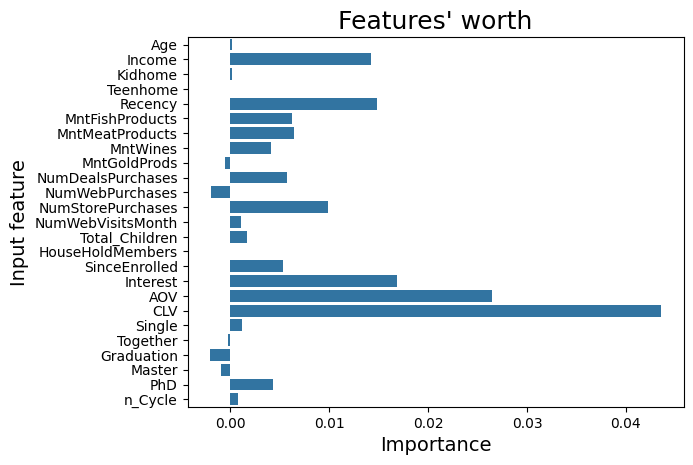

CLV: 0.043558897243107735
AOV: 0.026416040100250605
Interest: 0.016892230576441066
Recency: 0.014837092731829553
Income: 0.01423558897243105
NumStorePurchases: 0.009874686716791951
MntMeatProducts: 0.006466165413533805
MntFishProducts: 0.006265664160400967
NumDealsPurchases: 0.00576441102756889
SinceEnrolled: 0.005363408521303222
PhD: 0.004360902255639069
MntWines: 0.004110275689223035
Total_Children: 0.0016541353383458413
Single: 0.00115288220551375
NumWebVisitsMonth: 0.0010526315789473458
n_Cycle: 0.0008020050125313187
Kidhome: 0.00015037593984960443
Age: 0.00015037593984959334
HouseHoldMembers: 0.0
Teenhome: 0.0
Together: -0.00020050125313284168
MntGoldProds: -0.0005012531328321209
Master: -0.0009523809523809749
NumWebPurchases: -0.002005012531328365
Graduation: -0.0020551378446115615


In [731]:
# Create a ColumnTransformer for scaling
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=0)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

In [732]:
# # scaler = StandardScaler()
# # X_train_resampled = scaler.fit_transform(X_train_resampled)

# # Define the parameter grid
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_leaf_nodes': [5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 14],
#     'min_samples_leaf': [1, 2, 4, 7]
# }

# # Create the decision tree classifier
# dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# print(best_params)

clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10,
  max_leaf_nodes=30,
  min_samples_split=7, 
  min_samples_leaf=2)

In [733]:
# clf = LogisticRegression(random_state=0, C=best_params['C'], penalty=best_params['penalty'])
clf.fit(X_train_resampled, y_train_resampled)
train_preds = clf.predict(X_train_resampled)
preds = clf.predict(X_test)

## Train Scores

In [734]:
acc = accuracy_score(y_train_resampled, train_preds)
prec = precision_score(y_train_resampled, train_preds)
rec = recall_score(y_train_resampled, train_preds)
f1 = f1_score(y_train_resampled, train_preds)
auc = roc_auc_score(y_train_resampled, train_preds)

In [735]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8273
Precision: 0.7770
Recall: 0.9180
F1: 0.8416
AUC: 0.8273


## Test Scores

In [736]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [737]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7053
Precision: 0.3052
Recall: 0.7677
F1: 0.4368
AUC: 0.7310


In [738]:
from sklearn.tree import plot_tree


plt.figure(figsize=(100,100))
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No', 'Yes'],
          filled = True)
plt.show()

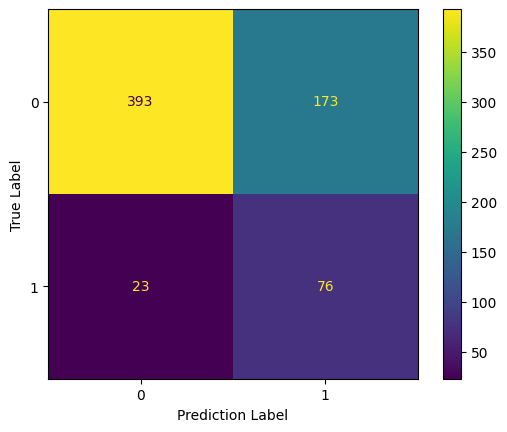

In [739]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# plt.title('Did the customer say yes?')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

In [740]:
# results_df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
# incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]
# all_incorrect_rows = df.iloc[incorrect_predictions.index]
# all_incorrect_rows = pd.merge(incorrect_predictions, df, left_index=True, right_index=True)

# # Display Rows for Incorrect Predictions
# print("Rows with Incorrect Predictions:")
# all_incorrect_rows[0:20]